In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

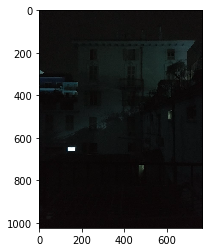

In [2]:
# Poor quality image.
display_1 = cv2.imread('image1.jpg')
plt.imshow(display_1)

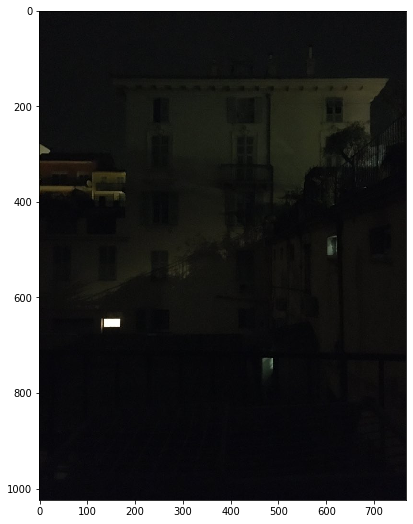

In [3]:
#converting to RGB
display_1= cv2.cvtColor(display_1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(9,9))
plt.imshow(display_1)

In [4]:
# Image1 shape
display_1.shape

(1024, 768, 3)

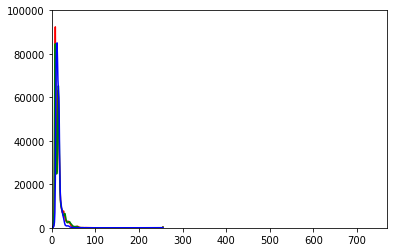

In [5]:
color = ('r','g','b')
for i,col in enumerate(color):
    hist = cv2.calcHist([display_1],[i],None,[256],[0,256])
    plt.plot(hist,color = col)
    plt.xlim([0,768])
    plt.ylim([0,100000])
plt.show()

In [6]:
# There is an uneven color distribution, the number of pixels peaks to almost 85000 from the range of 0-50 and the tonal scale is not well spread.

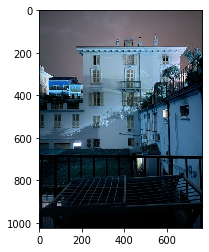

In [7]:
# High quality image
review = cv2.imread('image1b.jpg')
plt.imshow(review)

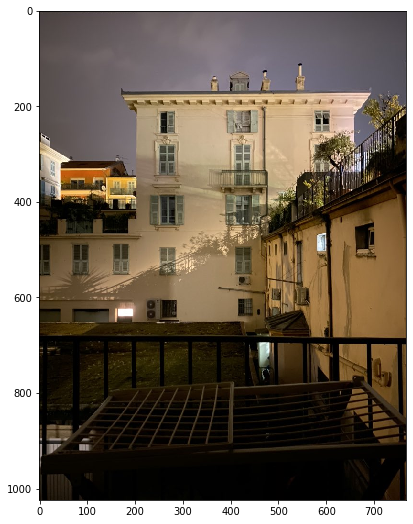

In [8]:
#converting to RGB
review = cv2.cvtColor(review, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(9,9))
plt.imshow(review)

In [9]:
# Image1b shape
review.shape

(1024, 768, 3)

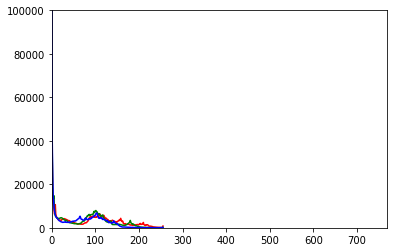

In [10]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([review],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,768])
    plt.ylim([0,100000])
plt.show()

In [11]:
# The color distribution of the high quality image shows that the tonal scale was well spread, this is indicated by the x axis as well as the number of pixels indicated by the y-axis

In [12]:
# Trying to see if I can get the same effect for the poor quality image.

In [13]:
# Creating a function that applys a kernel
def applykernel(image, kernel):
    
    output = cv2.filter2D(image,-1,kernel)
    
    return output

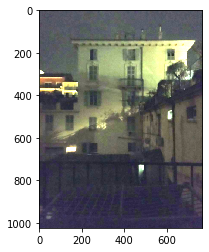

In [14]:
# kernel_1
kernel_1 = np.ones((5, 5)) * (2.5 /10)# the lower the denominator the brighter image, the higher the denominator the darker the image
display_2 = applykernel(display_1, kernel_1)
plt.imshow(display_2)

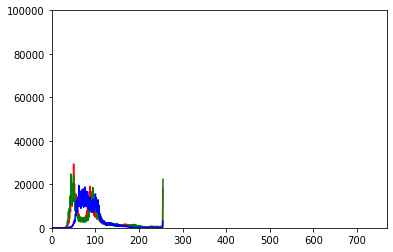

In [15]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([display_2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,768])
    plt.ylim([0,100000])
plt.show()

In [16]:
display_3 = np.zeros(display_2.shape, display_2.dtype)
alpha =1.4 # Simple contrast control
beta = 2    # Simple brightness control

In [17]:
for y in range(display_2.shape[0]):
    for x in range(display_2.shape[1]):
        for c in range(display_2.shape[2]):
            display_3[y,x,c] = np.clip(alpha*display_2[y,x,c] + beta, 0, 255)


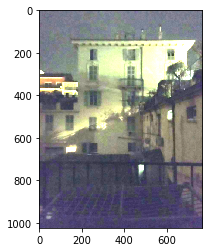

In [18]:
plt.imshow(display_3)

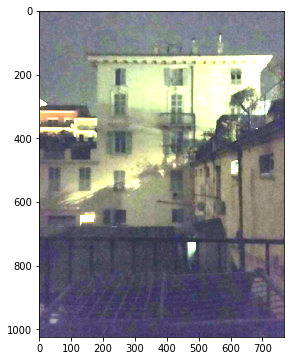

In [19]:
plt.figure(figsize=(6,6))
plt.imshow(display_3)

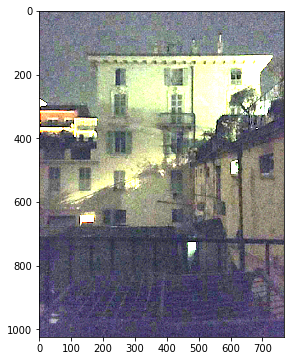

In [20]:
kernel_3 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
display_4 = applykernel(display_3, kernel_3)
plt.figure(figsize=(6,6))
plt.imshow(display_4)

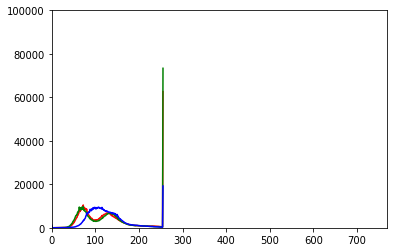

In [21]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([display_4],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,768])
    plt.ylim([0,100000])
plt.show()

In [22]:
# Implementing HDR

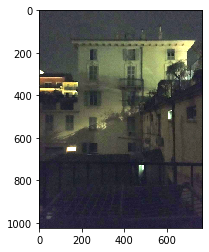

In [23]:
kernel_1 = np.ones((3, 3)) * (1 /2)
display_n = applykernel(display_1, kernel_1)
plt.imshow(display_n)

In [24]:
 img_list = [display_2,display_n,display_4] 

In [25]:
# Exposure fusion using Mertens
merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img_list)

In [26]:
# Convert datatype to 8-bit and save
mertens_8 = np.clip(res_mertens*255, 0, 255).astype('uint8')

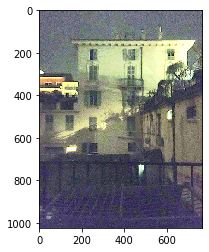

In [27]:
plt.imshow(mertens_8)

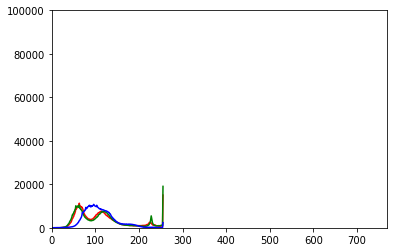

In [28]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([mertens_8],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,768])
    plt.ylim([0,100000])
plt.show()

### The task was not to get poor quality image to look like the high quality image but to improve the poor quality image based on the attributes I noticed from the high quality image. 